In [30]:
# Up-sampling effort: randomly duplicating observations from the minority class 
# to reinforce its signal

In [31]:
# load necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [32]:
# module for resampling
from sklearn.utils import resample

In [33]:
# os.getcwd()

In [34]:
# os.listdir(os.getcwd())

In [35]:
# read the csv x_data file into Pandas 

all_param_df = pd.read_csv("..\\reduced_data\\all_param.csv")
all_param_df.shape


(39624, 351)

In [36]:
# separate classes in dataframes of success/failure
df_fail = all_param_df[all_param_df.suc_class==0]
df_succ = all_param_df[all_param_df.suc_class==1]

In [37]:
df_fail.shape

(38818, 351)

In [38]:
df_succ.shape

(806, 351)

In [39]:
# Upsaple Minority class
df_succ_upsampled = resample(df_succ, replace=True, n_samples=38000, random_state=2)

# combine failed with upsampled minority class into new dataframe
df_upsampled = pd.concat([df_fail, df_succ_upsampled])

# display new class counts
df_upsampled.suc_class.value_counts()

0    38818
1    38000
Name: suc_class, dtype: int64

In [40]:
# # reindex the new upsampled dataframe
# df_upsampled.reindex()

In [41]:
# df_upsampled

In [42]:
# # read the csv y_data file into Pandas 
# y_parm_df = pd.read_csv("reduced_data\\y_params.csv")
# y_parm_df.shape

In [43]:
# using binary classification for logistic regression
y_class = df_upsampled['suc_class']

In [44]:
y_class

0        0
1        0
2        0
3        0
4        0
        ..
39384    1
39384    1
24162    1
38226    1
37100    1
Name: suc_class, Length: 76818, dtype: int64

In [45]:
# create new X parameters df
x_data = df_upsampled.drop(['appid','maxccu','success_class','suc_class','followers','positive', 'negative', 'totaltags']  , axis=1)

In [46]:
x_data.shape

(76818, 343)

In [47]:
# define training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_class, random_state=5)

In [48]:
# baseline example
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [49]:
# Pre-processing  - scale the data using the MinMaxScaler and perform some feature selection

# from sklearn.preprocessing import MinMaxScaler
# x_scaler = MinMaxScaler().fit(X_train)

In [50]:
# apply the trained scales (MinMax) to the training and testing data

# X_train_scaled = x_scaler.transform(X_train)
# X_test_scaled = x_scaler.transform(X_test)

In [51]:
# Instantiate and Train model
y = y_train
X = X_train

clf_1 = LogisticRegression(max_iter=1000).fit(X, y)

C:\Users\wavau\anaconda3\envs\pythondata\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [52]:
# Apply fitted model to test data - what accuracy?
print(f"Training Data Score: {clf_1.score(X_train, y_train)}")
print(f"Testing Data Score: {clf_1.score(X_test, y_test)}")

Training Data Score: 0.8842795896759412
Testing Data Score: 0.8861234053631867


In [53]:
# Understand precision, recall, f1 score with classification report for logistic classification
from sklearn.metrics import classification_report
predictions = clf_1.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      9692
           1       0.92      0.84      0.88      9513

    accuracy                           0.89     19205
   macro avg       0.89      0.89      0.89     19205
weighted avg       0.89      0.89      0.89     19205



In [54]:
# thinking about baseline results:
# Support is balanced due to sampling adjustments
# Percision: for no success: 90%, better for successful games: 93%
# Recall: Fraction of positives found, 94% for 0, 89% for 1
# f1 score: 92%

<AxesSubplot:>

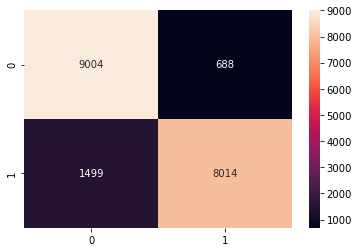

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = clf_1.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm2, annot=True, fmt=".0f")

In [56]:
# Look at co-efficients for meaning

print(x_data.columns.shape, clf_1.coef_.shape)
new_col = np.reshape(clf_1.coef_, -1)
print(new_col.shape)
features_list = pd.DataFrame(zip(x_data.columns, new_col))
features_list = features_list.sort_values(by=[1], ascending=False)

import pandas
pandas.set_option('display.max_rows', 346)
features_list

(343,) (1, 343)
(343,)


,0,1
321,tagwordgame,0.091777
266,tagsoftware,0.083043
19,tagaudioproduction,0.070870
81,tagbasketball,0.051832
256,tagsniper,0.050459
50,tagsoccer,0.043736
258,tagilluminati,0.040922
269,tagmusicbasedproceduralgeneration,0.033693
235,tagpinball,0.032833
278,tagdynamicnarration,0.032310
